In [42]:
import sys 
import numpy
import pandas 
import matplotlib
import seaborn
import scipy
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy: 1.14.3
Pandas: 0.23.0
Matplotlib: 2.2.2
Seaborn: 0.8.1
Scipy: 1.1.0


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("creditcard.csv") 

In [45]:
data = data.sample(frac = .1, random_state = 1)
print(data.shape)

(28481, 31)


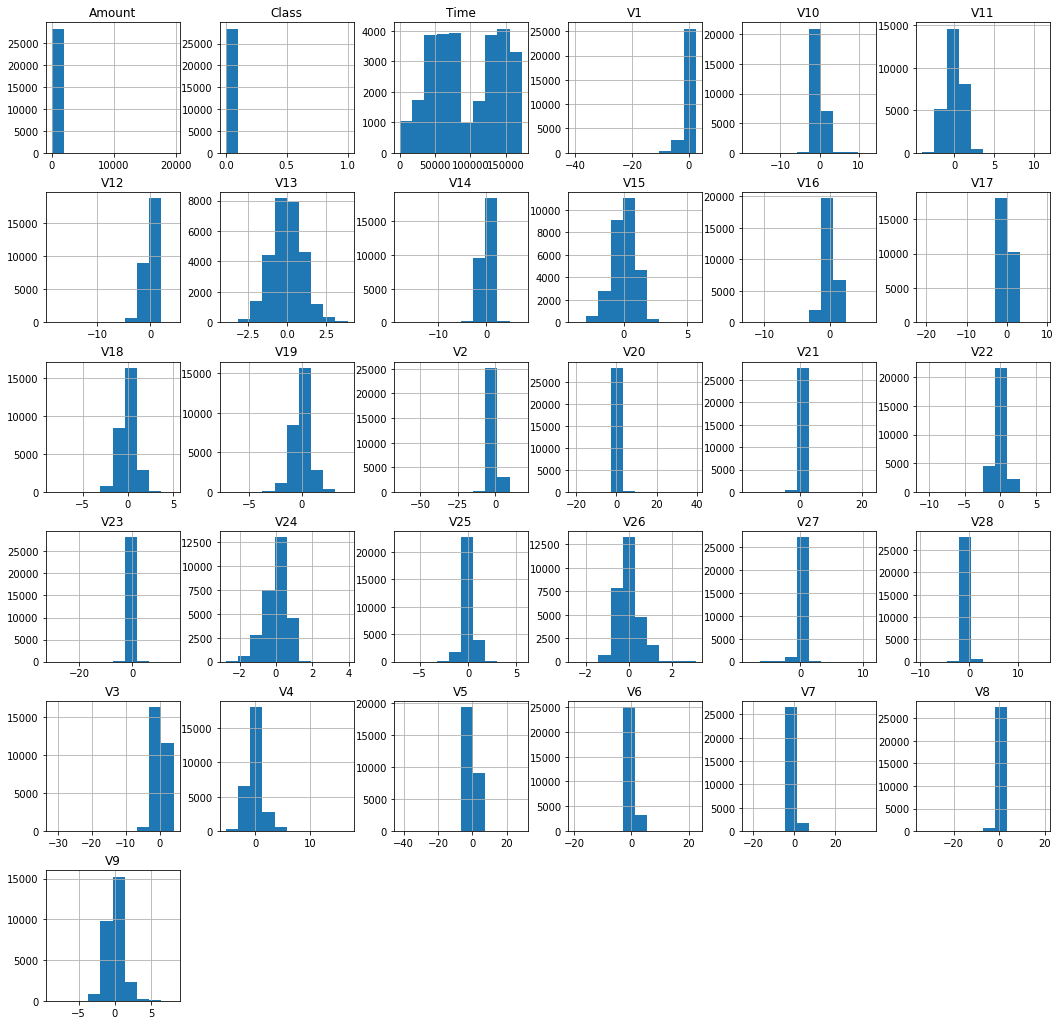

In [46]:
data.hist(figsize = (18,18))
plt.show()

In [47]:
Fraud = data[data["Class"] == 1]
Valid = data[data["Class"] == 0]
outlier =len(Fraud)/float(len(Valid))
print(outlier)
print ('Fraud Cases: {}'.format(len(Fraud)))
print ('Valid Cases: {}'.format(len(Valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


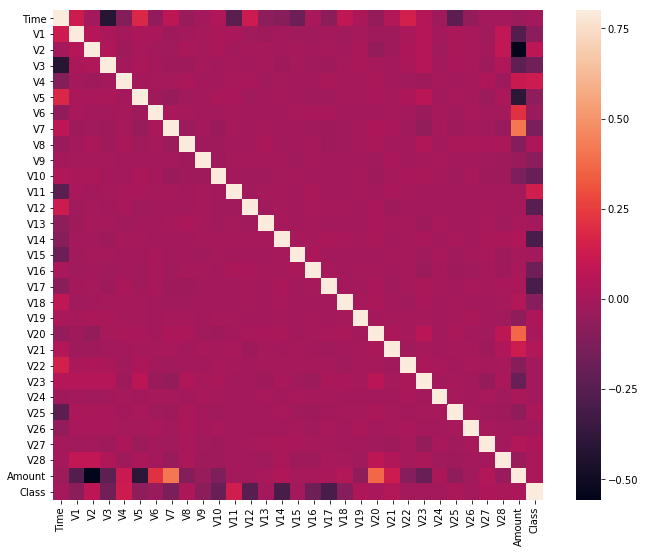

In [48]:
corematrix = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corematrix, vmax = .8, square = True)

In [49]:
column = data.columns.tolist()
column = [c for c in column if c not in ["Class"]]
target = "Class"
x = data[column]
y = data[target]
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [50]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [60]:
#define rand state
state = 1

#detection methods
clasifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x), 
                                        contamination= outlier,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors= 20, 
                                               contamination= outlier)
}

In [61]:
#Fitting Model
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(clasifiers.items()):
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor": 
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
            
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    
    #run classification matrix 
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))
    
    

Isolation Forest: 71
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

